In [2]:
import cv2
import os
import time
from PIL import Image
from shutil import copyfile

def process_image(img):
    # clone the frame
    clone = img.copy()
    # convert to grayscale
    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # applying gaussian blur
    value = (35, 35)
    blurred = cv2.GaussianBlur(grey, value, 0)

    # thresholdin: Otsu's Binarization method
    _, thresh = cv2.threshold(blurred, 127, 255,
                               cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return thresh
def create_folder(folder_name):
    if not os.path.exists(folder_name):
        os.mkdir(folder_name)

def init_create_folder():
    # create the folder and database if not exist
    if not os.path.exists("Alphabets_224_BW"):
        os.mkdir("Alphabets_224_BW")
def perform_conversion(source_path = "Alphabets_224/", dest_path="Alphabets_224_BW/"):
    try:
        start=time.time()
        sub_folders = os.listdir(source_path)
        sub_folders.sort()
        for folder in sub_folders:
            if not os.path.exists(dest_path+folder):
                os.mkdir(dest_path+folder)
            img_list = os.listdir(source_path+folder+"/")
            for img_ in img_list:
                img = cv2.imread(source_path+folder+"/"+img_)
                img = process_image(img)
                img_name= dest_path+folder+"/"+img_
                cv2.imwrite(img_name, img)
        end=time.time()
        print("----Conversion Successful----")
        print("Files Saved to :",dest_path)
        print("Time Elapsed :{} sec".format(end-start))
    except Exception as e:
        print("Something Happened :",e)

        
init_create_folder()
# create_folder("gestures/"+str(g_name))

In [ ]:
from shutil import copyfile

copyfile(src, dst)

In [6]:
img = cv2.imread("Alphabets_224/A/0.jpg")

In [7]:
img

array([[[161, 168, 177],
        [160, 167, 176],
        [158, 165, 174],
        ...,
        [134, 146, 148],
        [134, 146, 148],
        [135, 147, 149]],

       [[161, 168, 177],
        [160, 167, 176],
        [160, 167, 176],
        ...,
        [134, 146, 148],
        [134, 146, 148],
        [134, 146, 148]],

       [[161, 168, 177],
        [161, 168, 177],
        [161, 168, 177],
        ...,
        [136, 145, 148],
        [134, 146, 148],
        [134, 146, 148]],

       ...,

       [[153, 158, 161],
        [153, 158, 161],
        [153, 158, 161],
        ...,
        [137, 144, 147],
        [137, 144, 147],
        [137, 144, 147]],

       [[154, 158, 163],
        [154, 158, 163],
        [154, 158, 163],
        ...,
        [136, 143, 146],
        [136, 143, 146],
        [136, 143, 146]],

       [[154, 158, 163],
        [154, 158, 163],
        [154, 158, 163],
        ...,
        [135, 142, 145],
        [135, 142, 145],
        [134, 141, 144]]

In [8]:
img2 = process_image(img)

In [9]:
to_predict2 = Image.fromarray(img2)

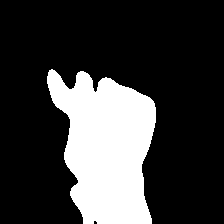

In [11]:
to_predict2

In [14]:
import numpy as np
kernel = np.ones((5,5),np.uint8)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

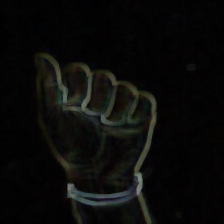

In [16]:
img_MOR = Image.fromarray(gradient)
img_MOR

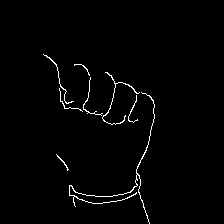

In [19]:
edges = cv2.Canny(img,100,200)
img_edge = Image.fromarray(edges)
img_edge

In [21]:
img.shape

(224, 224, 3)

In [27]:

from matplotlib import pyplot as plt

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0


markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

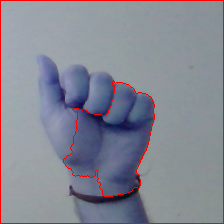

In [29]:
Image.fromarray(img)